# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Novita Rakagukguk
- Email:novitarajagukguk090@student.unud.ac.id
- Id Dicoding:novita_rajagukguk

## Menentukan Pertanyaan Bisnis
1. Pada musim kapan total sewa sepeda paling tinggi dan paling rendah disewa?
2. Bagaimana pengaruh hari kerja dan hari libur terhadap penyewaan sepeda?
3. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [3]:
hour_df = pd.read_csv("/content/drive/MyDrive/Dicoding/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df = pd.read_csv('/content/drive/MyDrive/Dicoding/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat bahwa dteday belum memiliki format datetime dan masih memiliki fpormat object

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan parameter statistik diatas, data yang diperoleh memiliki kualitas yang baik

In [11]:
hour_df.duplicated().sum()

0

In [12]:
day_df.duplicated().sum()

0

### Cleaning Data

In [13]:
datetime = ["dteday"]

for date in datetime:
  hour_df[date]= pd.to_datetime(hour_df[date])
  day_df[date]= pd.to_datetime(day_df[date])

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [16]:
hour_df.groupby(by='season').cnt.nunique().sort_values(ascending=False)

season
3    760
2    721
4    690
1    482
Name: cnt, dtype: int64

In [19]:
day_df.groupby(by='season').cnt.nunique().sort_values(ascending=False)

season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

Berdasarkan pivot tersebut terlihat bahwa total penyewaan sepeda paling tinggi adalah pada musim gugur(3) diikuti musim panas(2), lalu musim dingin(3) dan  musim semi(1)

In [40]:
day_df.corr()

<ipython-input-40-2760edc27d1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_df.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [42]:
kolom_cor =['holiday', 'weekday', 'workingday','weathersit','cnt']
korelasi= day_df[kolom_cor].corr()
print(korelasi)

             holiday   weekday  workingday  weathersit       cnt
holiday     1.000000 -0.101960   -0.253023   -0.034627 -0.068348
weekday    -0.101960  1.000000    0.035790    0.031087  0.067443
workingday -0.253023  0.035790    1.000000    0.061200  0.061156
weathersit -0.034627  0.031087    0.061200    1.000000 -0.297391
cnt        -0.068348  0.067443    0.061156   -0.297391  1.000000


Dari tabel korelasi diatas terlihat bahwa hari libur memiliki korelasi yang negatif dengan jumlah total sewa sepeda.  Lalu pada hari kerja memiliki korelasi yang kecil terhadap jumlah sewa sepeda. Terakhir, cuaca memiliki korelasi yang negatif dengan total sewa sepeda

In [47]:
day_df.groupby(by='workingday').cnt.nunique()

workingday
0    223
1    487
Name: cnt, dtype: int64

Dari tabel diatas terlihat bahwa pada hari kerja yang ditunjukkan nomor 1 ada sebanyak 487 penyewa sepeda dan pada hari libur ada sebanyak 223 penyewa sepeda

In [50]:
day_df.groupby(by='weathersit').cnt.nunique()

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

 1. Pada musim kapan total sewa sepeda paling tinggi dan paling rendah disewa?

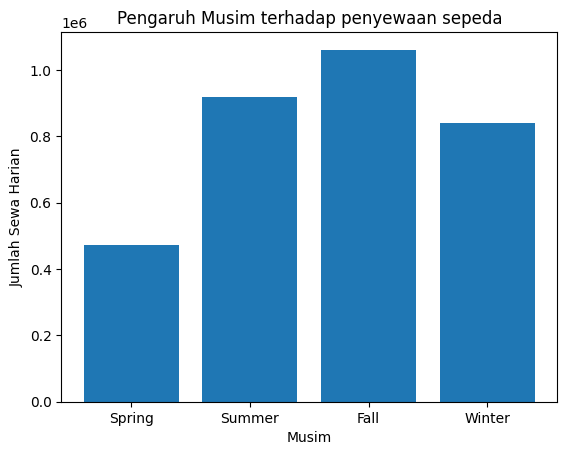

In [32]:
season_data= day_df.groupby(by='season').cnt.sum()
season_name = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar (season_name, season_data)
plt.xlabel("Musim")
plt.ylabel("Jumlah Sewa Harian")
plt.title('Pengaruh Musim terhadap penyewaan sepeda')
plt.show()

Berdasarkan plot tersebut terlihat bahwa total penyewaan sepeda paling tinggi adalah pada musim gugur(3) diikuti musim panas(2), lalu musim dingin(3) dan  musim semi(1)

2. Bagaimana pengaruh hari kerja dan hari libur terhadap penyewaan sepeda?


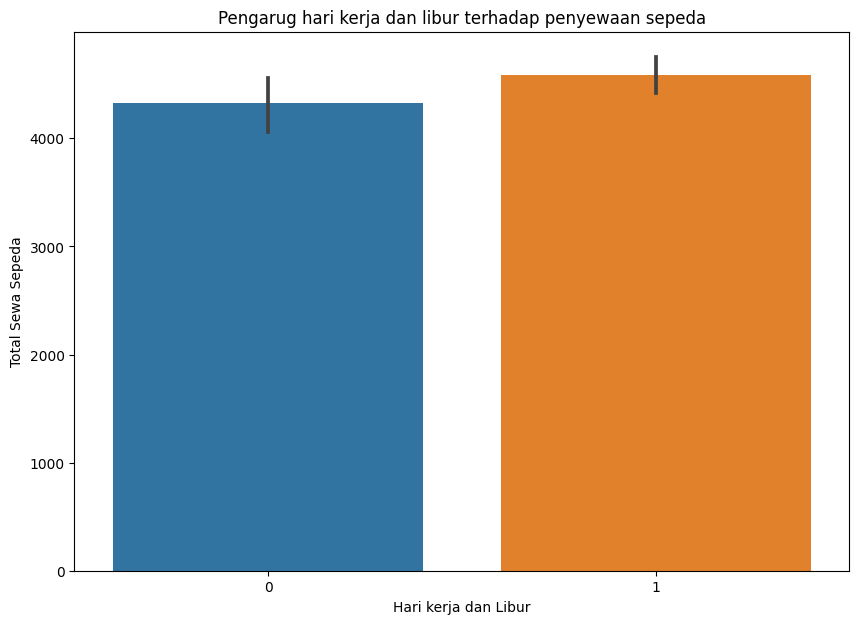

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x='workingday', y='cnt', data= day_df)
plt.title("Pengarug hari kerja dan libur terhadap penyewaan sepeda")
plt.xlabel("Hari kerja dan Libur")
plt.ylabel("Total Sewa Sepeda")
plt.show()

Berdasarkan plot tersbut terlihat bahwa pada hari kerja yang ditunjukkan angka 1 lebih tinggi daripada hari libur

3. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

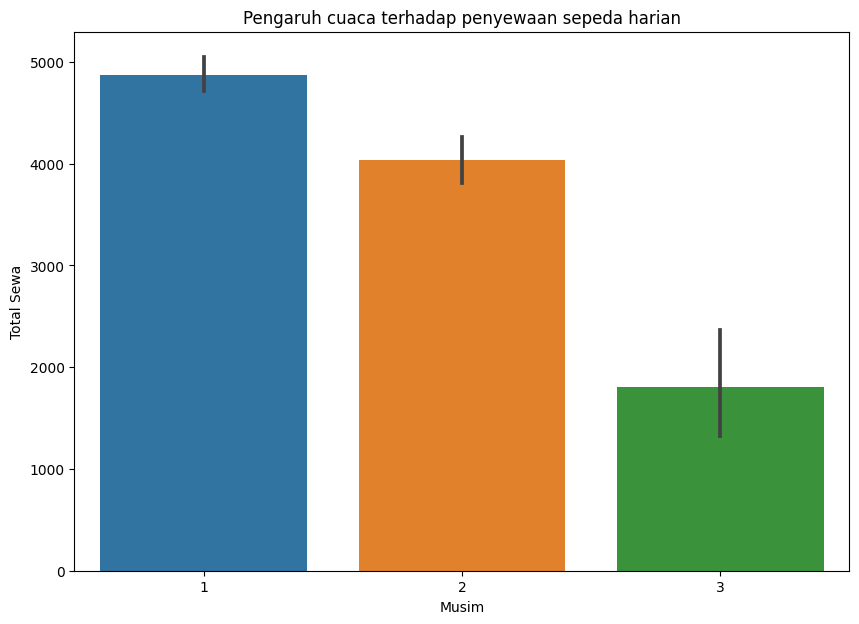

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(x='weathersit', y='cnt', data= day_df)

plt.title("Pengaruh cuaca terhadap penyewaan sepeda harian")
plt.xlabel("Musim")
plt.ylabel("Total Sewa")
plt.show()

Berdasarkan plot tersebut terlihat bahwa  jumlah penyewaan sepeda lebih tinggi saat cuaca cerah, sedikit berawan atau berawan sebagian (1)

## Conclusion

1. Total sewa paling tinggi berada pada musim gugur dan total sewa paling sedikit berada pada musim semi
2. Total sewa sepeda pada hari kerja lebih banyak daripada di hari libur. Namun jika melihat tabel korelasi, hubungan hari kerja maupun libir hanya memiliki korelasi yang kecil dengan total sewa.
3. Total sewa sepeda ditemukan lebih tinggi pada saat cuaca sedang cerah, sedikit berawan atau berawan sebagian. Namun jika dilihat melalui tabel korelasi bahwa hubungan anatar cuaca dengan total sewa adalah berkorelasi negatif.